In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
tf.set_random_seed(777)

C:\Users\USER\Anaconda3\envs\su\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\USER\Anaconda3\envs\su\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\USER\Anaconda3\envs\su\lib\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\USER\Anaconda3\envs\su\lib\site-packages\tensorflow\python\framework\dtypes.

In [2]:
def min_max_scaler(data):
    numerator = data - np.min(data, 0)
    denominator = np.max(data, 0) - np.min(data, 0)
    return numerator / (denominator + 1e-7)

In [3]:
xy=pd.read_csv('winequality-red.csv')
xy=xy.values
xy[:,:-1]=min_max_scaler(xy[:,:-1])
np.random.shuffle(xy)
test_line=int(len(xy)*0.7)
x_data=xy[:test_line,:-1]
y_data=xy[:test_line,[-1]] 
x_test=xy[test_line:,:-1]
y_test=xy[test_line:,[-1]] 

In [4]:
# placeholders for a tensor that will be always fed.
X = tf.placeholder(tf.float32, shape=[None, x_data.shape[1]])
Y = tf.placeholder(tf.float32, shape=[None, 1])
W = tf.Variable(tf.random_normal([x_data.shape[1], 1]), name='weight')
b = tf.Variable(tf.random_normal([1]), name='bias')

hypothesis = tf.matmul(X, W) + b
cost = tf.reduce_mean(tf.square(hypothesis - Y))
train = tf.train.GradientDescentOptimizer(learning_rate=0.1).minimize(cost)

Instructions for updating:
Colocations handled automatically by placer.


In [8]:
# Launch the graph in a session.
y_axis=[]
with tf.Session() as sess:
    # Initializes global variables in the graph.
    sess.run(tf.global_variables_initializer())
    print('Prediction data : ')
    for step in range(501):
        _, cost_val, hy_val = sess.run([train, cost, hypothesis], feed_dict={X: x_data, Y: y_data})
        y_axis.append(cost_val)
        print(hy_val)
    print("Cost val : ", cost_val, "\n")
 

Prediction data : 
[[ 0.13057175]
 [-0.22686484]
 [-0.24620017]
 ...
 [-0.18637744]
 [-0.54980636]
 [-0.17967162]]
[[2.5532532]
 [1.8425052]
 [1.8058109]
 ...
 [2.085094 ]
 [1.698656 ]
 [1.998884 ]]
[[4.0382624]
 [3.1116054]
 [3.0643578]
 ...
 [3.476582 ]
 [3.0805576]
 [3.3338642]]
[[4.948352 ]
 [3.8900259]
 [3.8364015]
 ...
 [4.328537 ]
 [3.931106 ]
 [4.1516294]]
[[5.5059404]
 [4.367588 ]
 [4.310151 ]
 ...
 [4.8497005]
 [4.4558306]
 [4.652283 ]]
[[5.847398 ]
 [4.6606784]
 [4.6010046]
 ...
 [5.1680603]
 [4.780748 ]
 [4.958516 ]]
[[6.056341 ]
 [4.8406577]
 [4.7797174]
 ...
 [5.3620906]
 [4.9831247]
 [5.145554 ]]
[[6.1840367]
 [4.9512806]
 [4.8896704]
 ...
 [5.4799056]
 [5.1103373]
 [5.259521 ]]
[[6.261919 ]
 [5.0193734]
 [4.9574637]
 ...
 [5.551007 ]
 [5.1914315]
 [5.328697 ]]
[[6.309261 ]
 [5.061386 ]
 [4.999407 ]
 ...
 [5.5934815]
 [5.24422  ]
 [5.3704214]]
[[6.33788  ]
 [5.0874047]
 [5.0255   ]
 ...
 [5.6184196]
 [5.2796226]
 [5.3953257]]
[[6.3550215]
 [5.1036115]
 [5.041873 ]
 ...
 

[[6.2337046]
 [5.1681814]
 [5.2979927]
 ...
 [5.497297 ]
 [6.1092196]
 [5.3989353]]
[[6.2335486]
 [5.1681614]
 [5.2985535]
 ...
 [5.497444 ]
 [6.109635 ]
 [5.3992453]]
[[6.2333937]
 [5.168141 ]
 [5.2991138]
 ...
 [5.497592 ]
 [6.1100464]
 [5.399556 ]]
[[6.23324  ]
 [5.1681204]
 [5.2996726]
 ...
 [5.4977407]
 [6.110453 ]
 [5.399866 ]]
[[6.233087 ]
 [5.1680994]
 [5.30023  ]
 ...
 [5.4978895]
 [6.1108556]
 [5.400176 ]]
[[6.232936 ]
 [5.168079 ]
 [5.300787 ]
 ...
 [5.498039 ]
 [6.1112537]
 [5.400487 ]]
[[6.232785 ]
 [5.1680574]
 [5.301342 ]
 ...
 [5.4981885]
 [6.1116476]
 [5.400797 ]]
[[6.232636 ]
 [5.168036 ]
 [5.3018956]
 ...
 [5.498338 ]
 [6.1120377]
 [5.4011064]]
[[6.2324877]
 [5.1680145]
 [5.3024483]
 ...
 [5.4984884]
 [6.112423 ]
 [5.4014163]]
[[6.2323403]
 [5.1679926]
 [5.303    ]
 ...
 [5.4986396]
 [6.1128044]
 [5.401726 ]]
[[6.232194 ]
 [5.1679707]
 [5.30355  ]
 ...
 [5.4987903]
 [6.1131816]
 [5.402035 ]]
[[6.232049 ]
 [5.1679487]
 [5.304099 ]
 ...
 [5.498942 ]
 [6.113555 ]
 [5.40

<function matplotlib.pyplot.show(*args, **kw)>

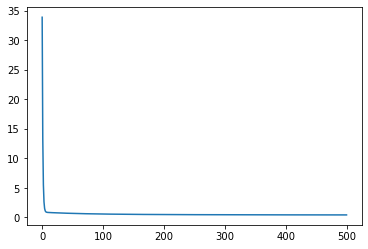

In [7]:
plt.plot(y_axis)
plt.show